In [1]:
import my

In [2]:
def least_connected(G, v):
    N = G[v]
    lc = N[0]
    for n in N:
        if n.degree() < lc.degree():
            lc = n
    return lc

In [3]:
def path_find(current, path, visited, G):
    for n in G.neighbors(current):
        if n not in visited:
            path.append(n)
            visited.add(n)
            print("greedy search...: ", path)
            return path_find(n, path, visited, G)
    return path

In [4]:
def a_path(G):
    init_path = [G.vertices()[0]]
    visited = {G.vertices()[0]}
    current = G.vertices()[0]
    
    path =path_find(current, init_path, visited, G)
    return path

In [5]:
graph, v, e = my.L_k_n(2,10)
    
initial_path = a_path(graph)
print("initial greedy path:", initial_path)

greedy search...:  [(0, 0), (1, (0, 0))]
greedy search...:  [(0, 0), (1, (0, 0)), (1, (0, 1))]
initial greedy path: [(0, 0), (1, (0, 0)), (1, (0, 1))]


In [6]:
def rotation(path, i):
    p1 = path[:i+1]
    p2 = path[i+1:]
    inv = list(reversed(p2))
    return p1+inv

In [7]:
def path_finder(path, G, n):
    if set(path) == set(G.vertices()):
        print("path found")
        return path
    else:
        visited = set(path)
        access = set(G.neighbors(path[-1]))-{path[-2]}
        access = access.intersection(visited)
        if not access:
            raise ValueError("no accessible vertices")
        unvisited = set(G.vertices())-visited
        end_access = [(v, len(set(G.neighbors(path[path.index(v)+1]))-visited)) for v in access]
        end_access.sort(key=lambda tup: tup[1], reverse=True)
        print("unvisited vertices:", unvisited)
        print("possible rot vertices, sorted:", end_access)
        v = end_access[0][0]
        i = path.index(v)
        print("rotating at index", i, "for vertice", v)
        rot_path = rotation(path, i)
        print("rotated path:", rot_path)
        tail = path_find(rot_path[-1], rot_path, visited, G)
        if len(tail) <= len(path):
            raise ValueError("no progress :c")
        
        return path_finder(tail, G, n)

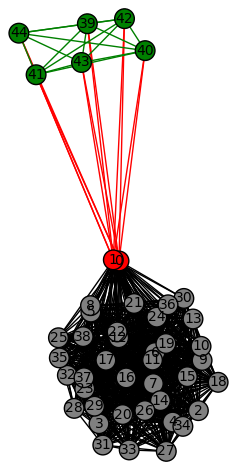

greedy search...:  [0, 32]
greedy search...:  [0, 32, 16]
greedy search...:  [0, 32, 16, 1]
greedy search...:  [0, 32, 16, 1, 33]
greedy search...:  [0, 32, 16, 1, 33, 17]
greedy search...:  [0, 32, 16, 1, 33, 17, 2]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4, 36]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4, 36, 20]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4, 36, 20, 5]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4, 36, 20, 5, 37]
greedy search...:  [0, 32, 16, 1, 33, 17, 2, 34, 18, 3, 35, 19, 4, 36, 20, 5, 37, 21]
greedy search...:  [0, 32, 16, 1, 33, 17, 

In [8]:
# tests :D

G, vertex_colors, edge_colors = my.frontier_mapping(45,6,2)
vcolors = my.invert_mapping(vertex_colors)
ecolors = my.invert_mapping(edge_colors)
H = Graph()
H.add_vertices(vcolors['green'])
H.add_edges(ecolors['green'])
draw = G.plot(vertex_size=200, vertex_colors = vcolors, edge_colors=ecolors)
draw.show()
path = path_finder(a_path(G), G, len(G.vertices())+1)
print("completed path", path)